In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

### SVD

SVD is a form of matrix decomposition.

You find 3 (?)factors(?) of your matrix that satisfy the following equation

$ A = USV^t $

    - A = our data matrix with n observations (rows) and p features (columns)
    - U = matrix of shape n,n of left singular vectors
    - V^T = transpose of a p,p matrix of right singular vectors
    - S = A diagonal matrix where the values on the diagnal are singular values of A
    
Left Singular Vectors are the eigenvectors of $AA^t$ while Right Singular Vectors are the eigenvectors of $A^tA$

Singular Values are the square roots of the eigenvalues of $AA^t$ or $A^tA$ (they have different eigenvectors but the _same_ eigenvalues!)

In [3]:
A = np.array([[2,4,3], [1,3,3], [0,0,1], [0,0,2]])
U, S, Vt = np.linalg.svd(A) # already sorted descending

print('U:')
print(U.round(3))
print()
print('Vt:')
print(Vt.round(3))
print()
print('S:', S) # numpy just returns the singular values

U:
[[-0.759  0.358 -0.544  0.   ]
 [-0.617 -0.129  0.776 -0.   ]
 [-0.093 -0.414 -0.143 -0.894]
 [-0.185 -0.827 -0.285  0.447]]

Vt:
[[-0.303 -0.694 -0.652]
 [ 0.321  0.57  -0.756]
 [-0.897  0.439 -0.05 ]]

S: [7.03817611 1.82847324 0.34750916]


In [4]:
# should recomibne to A

# S needs to be a NxP diag matrix
Sm = np.vstack([np.diag(S), np.zeros((len(U)-len(S),len(S)))]) # make diag and add a row of 0s for the last dimension

Anew = U.dot(Sm).dot(Vt)

# original
print(A)

Anew.round(3)

[[2 4 3]
 [1 3 3]
 [0 0 1]
 [0 0 2]]


array([[ 2.,  4.,  3.],
       [ 1.,  3.,  3.],
       [-0., -0.,  1.],
       [-0., -0.,  2.]])

In [5]:
# U = Eigenvects of np.dot(A,A.T)
# V_T = Eigenvects of np.dot(A.T, A).T

AAT = np.dot(A,A.T)
ATA = np.dot(A.T, A)

In [6]:
eigvalsU, eigvectsU = np.linalg.eig(AAT)
print('Eigenvals of AAT:', eigvalsU.round(3))
print()
print('Eigenvectors of AAT:')
print(eigvectsU.round(3))

# numpys svd U
# note some of the signs are reversed 
# this doesn't matter because...???
print()
print('Numpy U')
print(U.round(3))

Eigenvals of AAT: [49.536  3.343  0.121  0.   ]

Eigenvectors of AAT:
[[-0.759 -0.358 -0.544 -0.   ]
 [-0.617  0.129  0.776  0.   ]
 [-0.093  0.414 -0.143 -0.894]
 [-0.185  0.827 -0.285  0.447]]

Numpy U
[[-0.759  0.358 -0.544  0.   ]
 [-0.617 -0.129  0.776 -0.   ]
 [-0.093 -0.414 -0.143 -0.894]
 [-0.185 -0.827 -0.285  0.447]]


In [7]:
eigvalsV, eigvectsV = np.linalg.eig(ATA)
# Note the eigenvals are the same as eigvalsU
# just ordered differently (for practical purposes we would sort these in descending order)
print('Eigenvals of ATA:', eigvalsV.round(3))
print()
print('Transpose of Eigenvectors of ATA:')
print(eigvectsV.round(3).T)

# numpys svd Vt
print()
print('Numpy Vt')
print(Vt.round(3))

Eigenvals of ATA: [49.536  0.121  3.343]

Transpose of Eigenvectors of ATA:
[[ 0.303  0.694  0.652]
 [ 0.897 -0.439  0.05 ]
 [-0.321 -0.57   0.756]]

Numpy Vt
[[-0.303 -0.694 -0.652]
 [ 0.321  0.57  -0.756]
 [-0.897  0.439 -0.05 ]]


In [8]:
# S is equal to the square root of the eigenvalues
print('Square Root of Eigenvals of AAT')
print(np.sqrt(eigvalsU).round(3))
print()
print('S:')
print(S.round(3))

Square Root of Eigenvals of AAT
[7.038 1.828 0.348 0.   ]

S:
[7.038 1.828 0.348]


We can use our singular vectors to transform our dataset into a lower dimensional space that is still a good approximation of the original!

To transform our dataset, just multiply by Vt (note that for our original dataset this should also be equal to U•S since that is the definition of eigenvectors $ \lambda A = \lambda V $)

In [9]:
# Choose first two dims corresponding to 2 largest singular values
S2 = S[:2]

# use first two singular vectors (rows? because of Transpose?)
Vt2 = Vt[:2]

# and for U the vectors are the columns
U2 = U[:,:2]


In [10]:
# To transform a matrix into the new feature space
# take the dot product with the transpose of Vt2.
print('Transformed:')
print(A.dot(Vt2.T).round(3))

# the rows represent your original observations, your columns are your new features/dims

# note that for our original dataset this is equal to U2 • S2
# because of the definition of Eigenvectors (lA = lV)
U2.dot(np.diag(S2)).round(3)

Transformed:
[[-5.342  0.654]
 [-4.344 -0.237]
 [-0.652 -0.756]
 [-1.305 -1.512]]


array([[-5.342,  0.654],
       [-4.344, -0.237],
       [-0.652, -0.756],
       [-1.305, -1.512]])

In [11]:
# for Vt2.T, your rows represent your original features
# and the columns the new features.
# the values are the contributions of each orignal column to the new features.
Vt2.T

array([[-0.30337478,  0.32061109],
       [-0.69444558,  0.57041861],
       [-0.65246385, -0.75619517]])

### PCA

PCA is just SVD on the Covariance matrix of A!

PCA is a way to maximize the explained variance of the data set in a reduced feature set.

In [28]:
# using an actual dataset as an example to show the effects of the transformation
iris = sns.load_dataset('iris')
ftrs = iris.columns[:-1]
target = 'species'

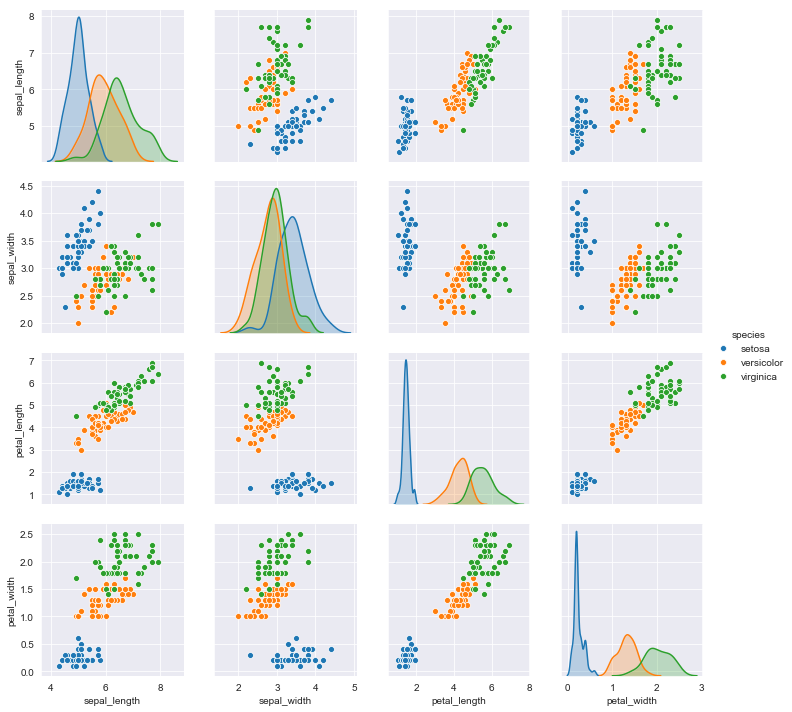

In [29]:
sns.pairplot(iris, hue=target)

In [30]:
cov_matrix = iris.cov()
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [31]:
# since this is a square matrix, u and v will be the same
u, s, vt = np.linalg.svd(cov_matrix)


print('U:')
print(u)
print()

print('V (un-transposed):')
print(vt.T)
print()

print('S:', s)

U:
[[-0.36138659 -0.65658877  0.58202985  0.31548719]
 [ 0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061  0.17337266 -0.07623608 -0.47983899]
 [-0.3582892   0.07548102 -0.54583143  0.75365743]]

V (un-transposed):
[[-0.36138659 -0.65658877  0.58202985  0.31548719]
 [ 0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061  0.17337266 -0.07623608 -0.47983899]
 [-0.3582892   0.07548102 -0.54583143  0.75365743]]

S: [4.22824171 0.24267075 0.0782095  0.02383509]


In [41]:
# transform our original data by VtT
transformed = pd.concat([iris[ftrs].dot(vt.T), iris.species], axis=1)
transformed.columns = ['PCA'+str(i+1) for i in range(vt.T.shape[1])] + ['species']
transformed.head()

,PCA1,PCA2,PCA3,PCA4,species
0,-2.818240,-5.646350,0.659768,-0.031089,setosa
1,-2.788223,-5.149951,0.842317,0.065675,setosa
2,-2.613375,-5.182003,0.613952,-0.013383,setosa
3,-2.757022,-5.008654,0.600293,-0.108928,setosa
4,-2.773649,-5.653707,0.541773,-0.094610,setosa


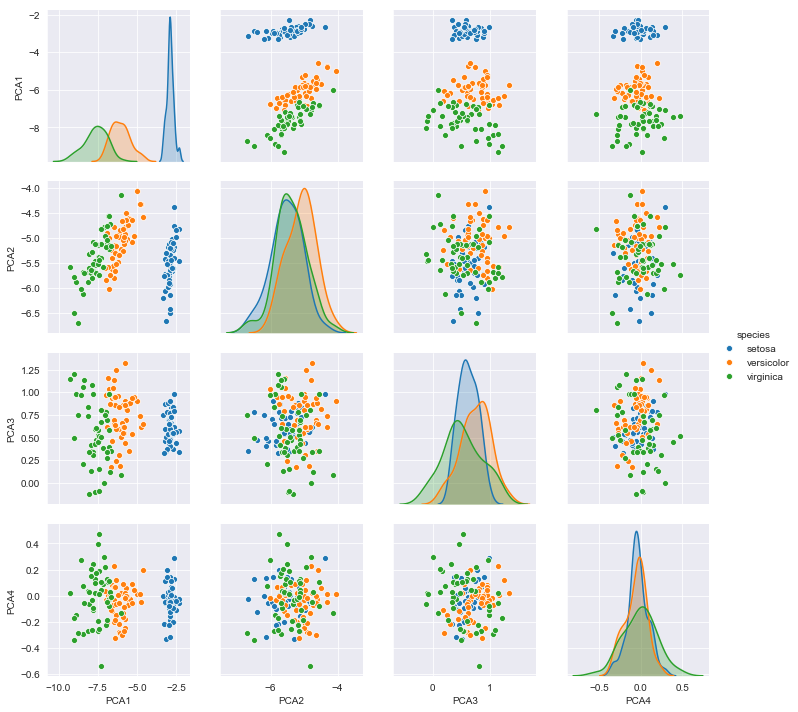

In [42]:
sns.pairplot(transformed, hue='species')

First dim explains most of the variance in the dataset compared to all the others. In this case it also improves class sepearatability. However, Linear Discriminant Analysis (LDA) is very similiar to pca except instead of using the covariance matrix, it uses a combined scatter matrix that relates the _within class_ variance to the _between class_ variance. Decomposition using LDA results in dimensions that maximally separate the classes.
